## 钓鱼节点分析

In [12]:
import pandas as pd 
import os 
import warnings

warnings.filterwarnings('ignore')

In [13]:
pwd = os.getcwd()
print(pwd)

x:\Datasets\Blockchain\xblock.pro\Phishing


In [14]:

count = 0
data = {}
result = pd.DataFrame()

for file in os.listdir(pwd + "/非钓鱼一阶节点/"):
    if file.endswith(".csv"):
        df = pd.read_csv(pwd + "/非钓鱼一阶节点/" + file)
        # if len(df) > 50:
            # 按照时间戳进行排序
        df = df.sort_values(by='TimeStamp')
        # df['is_out'] = df['From'] == file.split('.')[0]
        # df['tx_value'] = df['Value'] * df['is_out'].apply(lambda x: -1 if x else 1)
        # # 账户余额的变化
        # df['balance'] = df['tx_value'].cumsum()
        # data[file.split('.')[0]] = df
        item = {}
        item['address'] = file.split('.')[0]
        item['tx_count'] = len(df)

        result = result.append(item, ignore_index=True)

In [15]:
result.head()

,address,tx_count
0,0x0000000000000000000000000000000000000000,1377
1,0x000419c40a811a052b56372f4a80823be47db756,252
2,0x000e0e5701b14fb77160bcc7bfe7256522d5927b,5
3,0x00267e4a01f25072e0e9347a2ccdd67091d7aeac,22
4,0x00316d956f5f35591ae021f4858a2a865c6ba02a,33


In [16]:
result.describe()

,tx_count
count,1700.000000
mean,98.867647
std,496.327266
min,1.000000
25%,4.000000
50%,12.000000
75%,33.000000
max,7471.000000


In [228]:
print(data.keys())

dict_keys(['0x0059b14e35dab1b4eee1e2926c7a5660da66f747', '0x00c33c49f9a2a920e3f3787204cbda9012d1912e', '0x0128282ce73c72decabaeace9358344adff449fe', '0x026e78f168df546aabb2733b37920c55b335be80', '0x03f034fb47965123ea4148e3147e2cfdc5b1f7a5', '0x058e49378461c239dae065114cd9fa1c0dbc25c1', '0x0591a42188996397fc7cd6db729045146c37696c', '0x05fbf1e3f105df6a4553f3c7f2ed93070a4bab46', '0x0a5650aba6473c48898f3d9366b52c21a4eec37b', '0x0a9f58ee19a7131ed031ea66a032c05c7efe965a', '0x0ae775637e63fa95855246fd82e96802d05883fc', '0x0b7f284d74f549731499c44aed2a10adcc9e9cc0', '0x0f89b38968065a571eeaf34dd6bf2093fb55c20f', '0x1086feeb031e45e8fcd770662aa8302d7c23ba1f', '0x11e10485a869018ffa4ba093e4af2b461a4e4697', '0x13098fdefba2129b8873bcff5c9ce2de1cf7f32f', '0x1363077895b20ae90f80794ce4e575559517d033', '0x13803f5e158fec64ae7d81ed6799398ab4eb1fee', '0x1451dbe4304a60b5b25b4d98b355effd440417af', '0x16c26eb6051fe13273c634cb6df70a26befa9ec3', '0x181c71726f12ce2514e8b93019eb22645a79f966', '0x18f6f44104e3f67f7e37

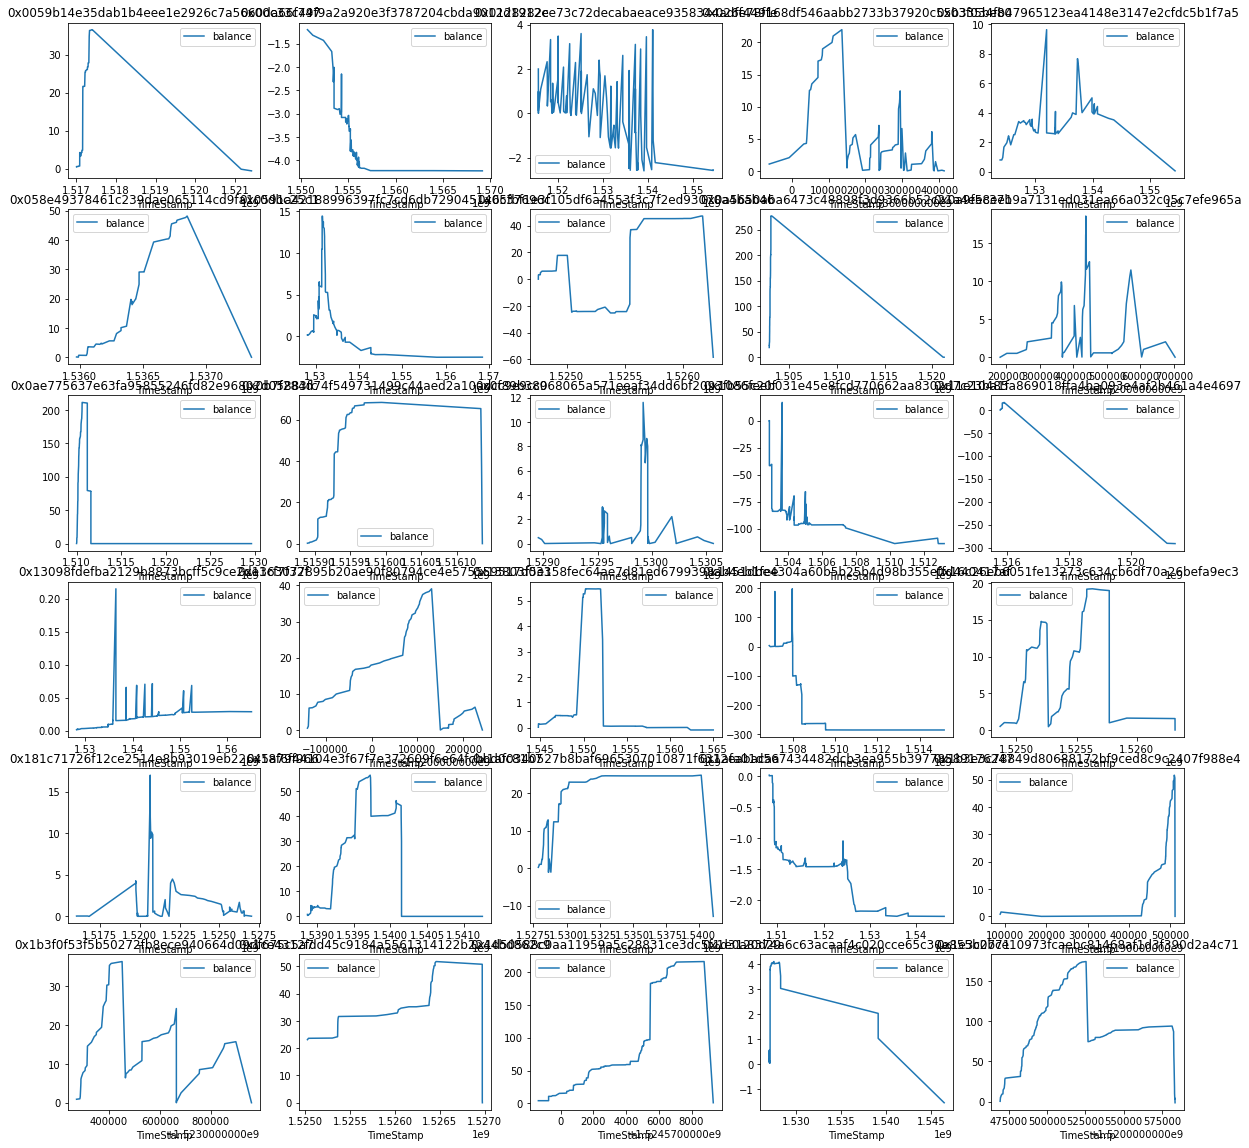

In [204]:
# 画data中datafram的balance的变化图, 画再不同的子图上
import matplotlib.pyplot as plt

# 共画30张子图
subgraph_num = 30

# 一行画6张子图
row_num = 6

# 一列画5张子图
col_num = 5

# 画图的大小
fig_size = (20, 20)

fig, axes = plt.subplots(row_num, col_num, figsize=fig_size)
sub_data = {k: data[k] for k in list(data.keys())[:subgraph_num]}

for i, (k, v) in enumerate(sub_data.items()):
    ax = axes[i // col_num, i % col_num]
    v.plot(x='TimeStamp', y='balance', ax=ax)
    ax.set_title(k)

plt.show()


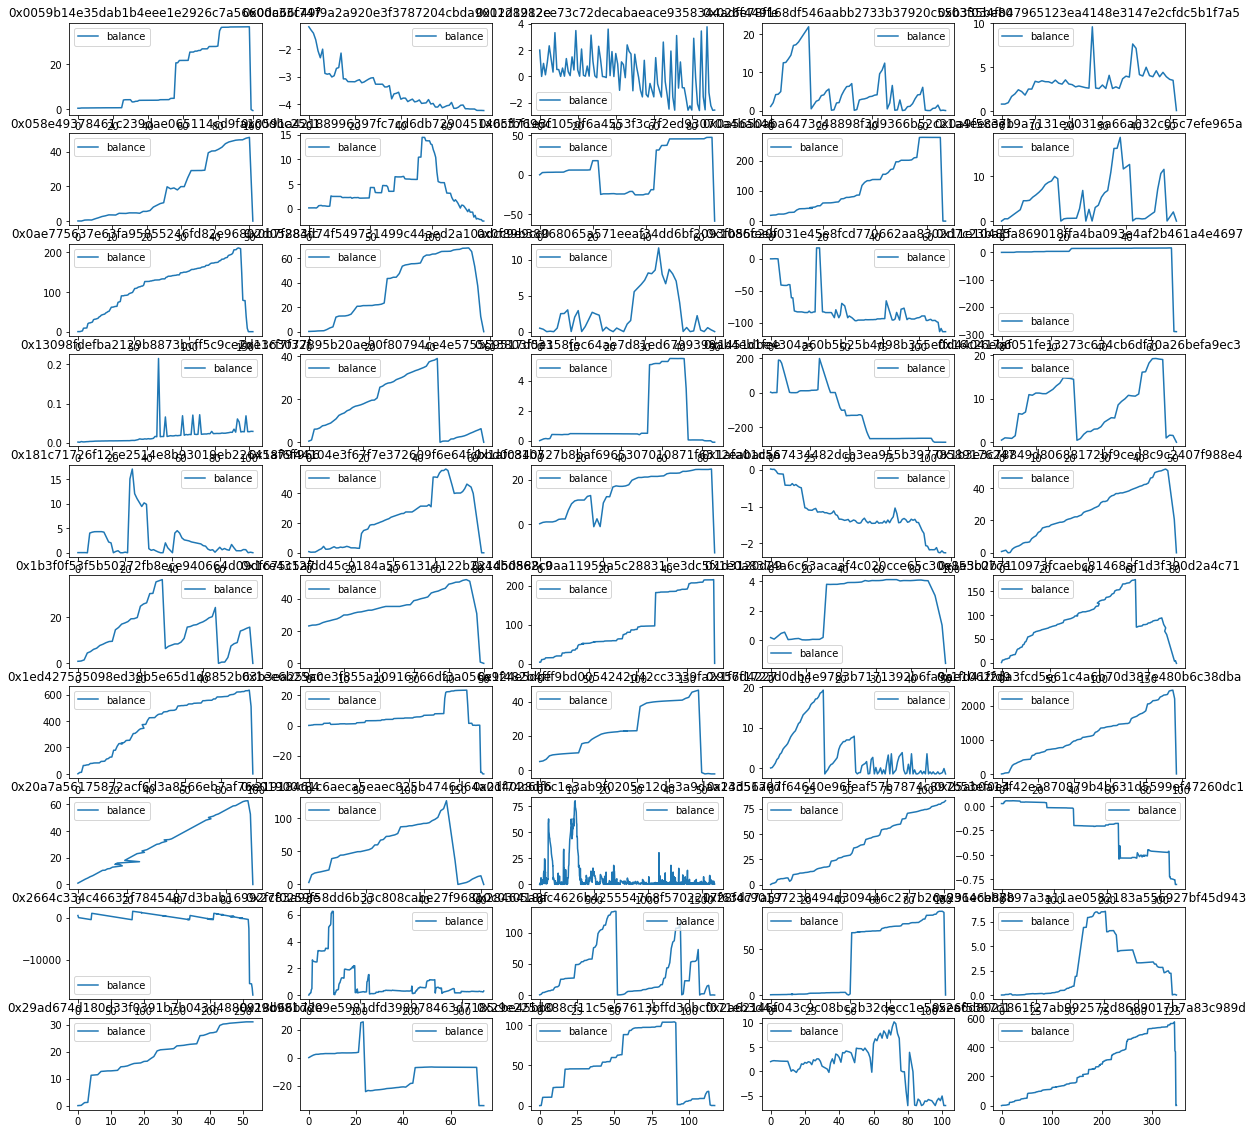

In [205]:
# 画data中datafram的balance的变化图, 画再不同的子图上
import matplotlib.pyplot as plt

# 共画30张子图
subgraph_num = 50

# 一行画6张子图
row_num = 10

# 一列画5张子图
col_num = 5

# 画图的大小
fig_size = (20, 20)

fig, axes = plt.subplots(row_num, col_num, figsize=fig_size)
sub_data = {k: data[k] for k in list(data.keys())[:subgraph_num]}

for i, (k, v) in enumerate(sub_data.items()):
    ax = axes[i // col_num, i % col_num]
    # 横坐标为index, 纵坐标为balance
    v.plot(y='balance', ax=ax)
    ax.set_title(k)

plt.show()


In [219]:
# K-means + DTW对时序数据进行聚类

import numpy as np

# 用于计算两个时间序列的距离
from fastdtw import fastdtw

# 用于聚类
from sklearn.cluster import KMeans



In [226]:
# K-Means聚类，使用自定义的距离函数
def kmeans_cluster(data, n_clusters=3):
    # 初始化聚类器
    kmeans = KMeans(n_clusters=n_clusters)
    # 计算距离矩阵
    dist_mat = np.zeros((len(data), len(data)))
    
    print("Start calculating distance matrix.")

    for i in range(len(data)):
        print("Processing ", i, " / ", len(data),".", end='\r')
        for j in range(i + 1, len(data)):
            # print("i = ", data[i])
            # print("j = ", data[j])
            # 计算两个长度不同的时间序列的距离
            a = data[i]
            b = data[j]

            dist, path = fastdtw(a, b, dist=lambda x, y: abs(x - y))
            

            dist_mat[i][j] = dist
            dist_mat[j][i] = dist
    print("Finished calculating distance matrix.")
    # print(dist_mat)
    # 聚类
    kmeans.fit(dist_mat)
    return kmeans.labels_


In [227]:
# k-means聚类
data_size = 50

# 用于聚类的数据
X = np.array([data[k]['Value'].values for k in data.keys()])
X = np.array([data[k]['balance'].values for k in data.keys()])
# 聚类的个数
n_clusters = 3
# kmeans 
labels = kmeans_cluster(X[:data_size], n_clusters=n_clusters)


Start calculating distance matrix.
[array([ 0.45001719,  0.45739266,  0.5568007 ,  0.5637225 ,  0.56826951,
        0.57057451,  0.57425907,  0.5885198 ,  0.59554204,  0.60052884,
        0.60966551,  0.61778604,  0.61862687,  0.62119597,  0.63640028,
        0.64023666,  0.64624886,  0.64897944,  0.65044033,  0.65172235,
        0.65464735,  0.65788735,  0.6611706 ,  0.66195468,  0.6750624 ,
        0.68214163,  4.08214163,  4.2148755 ,  4.22096761,  4.22899733,
        4.2370059 ,  3.2370059 ,  3.27006245,  3.52561073,  3.55102495,
        3.95102495,  3.95838692,  3.96853427,  3.97185432,  3.97753985,
        3.97960472,  3.98671472,  3.98931976,  3.99130517,  3.99937899,
        4.00265341,  4.02732857,  4.22732857,  4.23465774,  4.23954857,
        4.24691053,  4.2549191 ,  4.26253661,  4.79253661,  4.84180773,
        4.84621097, 20.57527874, 20.58518508, 21.62664408, 21.63487136,
       21.64265481, 21.64615571, 21.66352021, 21.66622419, 25.33032598,
       25.35180248, 25.36149

C:\Users\YangXikang\AppData\Local\Temp\ipykernel_19596\2286993392.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([data[k]['Value'].values for k in data.keys()])
C:\Users\YangXikang\AppData\Local\Temp\ipykernel_19596\2286993392.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([data[k]['balance'].values for k in data.keys()])


TypeError: object of type 'int' has no len()

In [209]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 1]


In [210]:
def plot_blance(X, labels, label_index, row_num, col_num, fig_size = (20, 5)):
    # print(label_index, print(len(X), len(labels)))
    # 获取对应类别的数据
    X = [X[i] for i in range(len(X)) if labels[i] == label_index]
    X = X[:row_num * col_num]
    
    fig, axes = plt.subplots(row_num, col_num, figsize=fig_size)
    for i in range(len(X)):
        ax = axes[i // col_num, i % col_num]
        ax.plot(X[i])
        ax.set_title("label = " + str(labels[i]))
    plt.show()

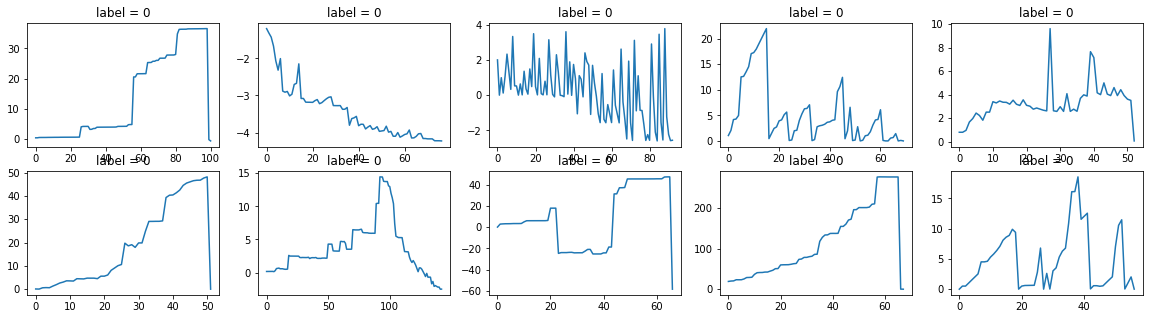

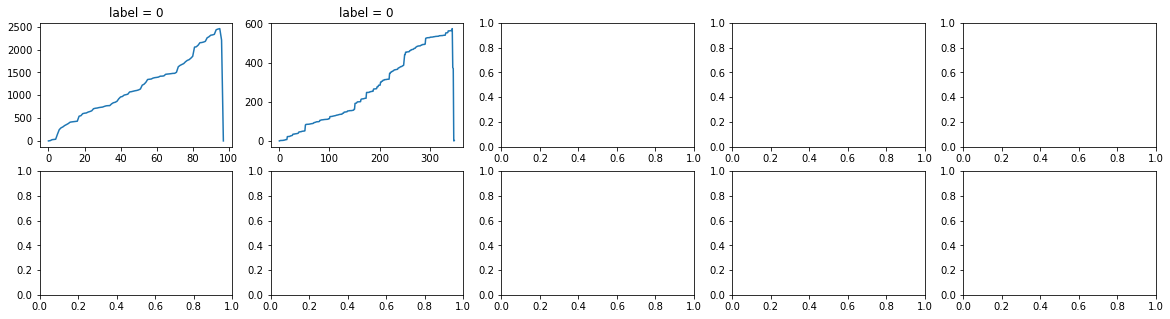

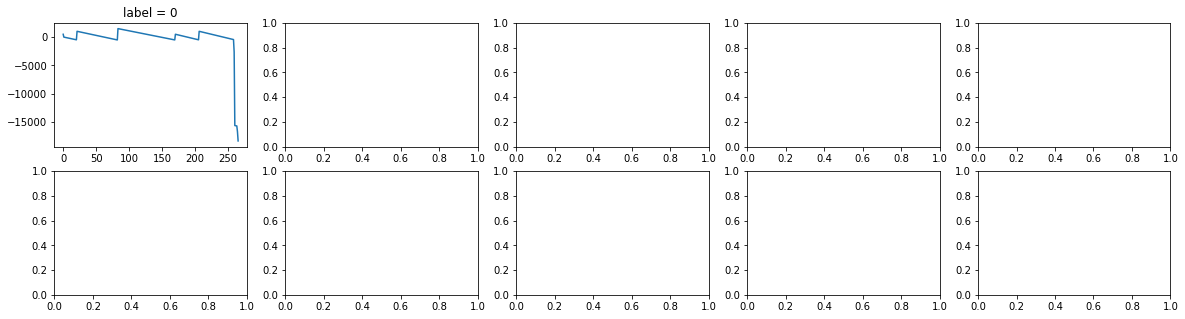

In [211]:
# 画图
for i in range(n_clusters):
    plot_blance(Y[:data_size], labels, i, 2, 5)